# Opioid Addiction Project
## Notebook 07: Testing

This notebook tests the execution code with multiple inputs, looking for areas where the code either technically fails (won't run at all) or practically fails (produces nonsensical outputs).

### W210, Capstone
Summer 2019

Team:  Cameron Kennedy, Aditi Khullar, Rachel Kramer, Sharad Varadarajan

# 0. Load Libraries and Set Global Variables
This analysis is performed in the cells below.

In [1]:
#Import Required Libraries
import pandas as pd
import random

#Plotting
import matplotlib.pyplot as plt
import seaborn as sns

#Custom data prep function used in both training and prediction 
import OpioidExecution as oe

#Set initial parameter(s)
pd.set_option('display.max_rows', 200)
pd.options.display.max_columns = 150
dataDir = './data/'

print('Pandas Version', pd.__version__)

Pandas Version 0.24.2


# 1. Generate Multiple Input Scenarios

## 1.1 Toy Example of Dictionary Parsing

Here we build a tiny example of looping through every option of dictionary values for multiple keys, while choosing random values for other keys.

In [2]:
#Build a test dictionary
testDict = {'A':[1,2,3,4,5],
            'B':['a','b','c'],
            'C':[6,7,8,9,10]
           }
testDict

{'A': [1, 2, 3, 4, 5], 'B': ['a', 'b', 'c'], 'C': [6, 7, 8, 9, 10]}

In [3]:
'''Loop through test dict, select each value once, 
while picking random values for non selected keys.
'''
inputDict = dict()

for k in testDict:
    for item in testDict[k]:
        print(k, item, ' | ', end='')
        
        for k2 in testDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(testDict[k2])
                
        print(inputDict)

A 1  | {'A': 1, 'B': 'a', 'C': 8}
A 2  | {'A': 2, 'B': 'a', 'C': 8}
A 3  | {'A': 3, 'B': 'b', 'C': 10}
A 4  | {'A': 4, 'B': 'c', 'C': 7}
A 5  | {'A': 5, 'B': 'b', 'C': 7}
B a  | {'A': 3, 'B': 'a', 'C': 9}
B b  | {'A': 5, 'B': 'b', 'C': 10}
B c  | {'A': 3, 'B': 'c', 'C': 9}
C 6  | {'A': 2, 'B': 'a', 'C': 6}
C 7  | {'A': 4, 'B': 'c', 'C': 7}
C 8  | {'A': 4, 'B': 'b', 'C': 8}
C 9  | {'A': 2, 'B': 'a', 'C': 9}
C 10  | {'A': 4, 'B': 'a', 'C': 10}


## 1.2 Apply Toy Example to Dictionary of Possible Values

In [4]:
#Create dictionary of possible values
allChoicesDict = {'NAME':['Test Scripter'],
                  'IRSEX':[1,2],
                  'EDUHIGHCAT':[1,2,3,4,5],
                  'AGE2':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17],
                  'IRALCRC':[1,2,3,9],
                  'IRALCFY':[991,993,1,12,50,100,300],
                  'CABINGEVR':[991,2,1],
                  'IRALCAGE':[991,14,17,20,21,100],
                  'TXYRRECVD2':[0,1],
                  'TXEVRRCVD2':[0,1],
                  'IRCIGRC':[9,1,2,3,4],
                  #'CIGDLYMO':[91,2,1],
                  'CIGAGE':[991,994,999,10,13,15,17,18,19,20,22,25,30,40,50,99],
                  'TOBYR':[0,1],
                  'FUCIG18':[2,1],
                  'IRMJRC':[9,1,2,3],
                  'IRMJFY':[991,993,1,2,3,7,10,20,30,40,50,100,200,300,365],
                  'FUMJ18':[2,1],
                  'IRCOCRC':[9,1,2,3],
                  'IRCRKRC':[9,1,2,3],
                  'IRHERRC':[9,1,2,3],
                  'IRHALLUCREC':[9,1,2,3],
                  'IRLSDRC':[9,1,2,3],
                  'IRECSTMOREC':[9,1,2,3],
                  'IRINHALREC':[9,1,2,3],
                  'IRMETHAMREC':[9,1,2,3],
                  'ADDPREV':[1,2,94],
                  'ADDSCEV':[1,2,94,99],
                  'BOOKED':[1,2,94,97],
                 }

allChoicesDict

{'NAME': ['Test Scripter'],
 'IRSEX': [1, 2],
 'EDUHIGHCAT': [1, 2, 3, 4, 5],
 'AGE2': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 'IRALCRC': [1, 2, 3, 9],
 'IRALCFY': [991, 993, 1, 12, 50, 100, 300],
 'CABINGEVR': [991, 2, 1],
 'IRALCAGE': [991, 14, 17, 20, 21, 100],
 'TXYRRECVD2': [0, 1],
 'TXEVRRCVD2': [0, 1],
 'IRCIGRC': [9, 1, 2, 3, 4],
 'CIGAGE': [991, 994, 999, 10, 13, 15, 17, 18, 19, 20, 22, 25, 30, 40, 50, 99],
 'TOBYR': [0, 1],
 'FUCIG18': [2, 1],
 'IRMJRC': [9, 1, 2, 3],
 'IRMJFY': [991, 993, 1, 2, 3, 7, 10, 20, 30, 40, 50, 100, 200, 300, 365],
 'FUMJ18': [2, 1],
 'IRCOCRC': [9, 1, 2, 3],
 'IRCRKRC': [9, 1, 2, 3],
 'IRHERRC': [9, 1, 2, 3],
 'IRHALLUCREC': [9, 1, 2, 3],
 'IRLSDRC': [9, 1, 2, 3],
 'IRECSTMOREC': [9, 1, 2, 3],
 'IRINHALREC': [9, 1, 2, 3],
 'IRMETHAMREC': [9, 1, 2, 3],
 'ADDPREV': [1, 2, 94],
 'ADDSCEV': [1, 2, 94, 99],
 'BOOKED': [1, 2, 94, 97]}

In [5]:
#Now generate all combinations for our full dictionary
inputDict = dict()
numTests = 0

for k in allChoicesDict:
    for item in allChoicesDict[k]:
        print(k, item, ' | ', end='')
        
        for k2 in allChoicesDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(allChoicesDict[k2])
                
        numTests+=1
        print(inputDict,'\n')
        
print('Total Test Cases:', numTests)

NAME Test Scripter  | {'NAME': 'Test Scripter', 'IRSEX': 2, 'EDUHIGHCAT': 3, 'AGE2': 9, 'IRALCRC': 3, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 991, 'TXYRRECVD2': 1, 'TXEVRRCVD2': 0, 'IRCIGRC': 3, 'CIGAGE': 99, 'TOBYR': 0, 'FUCIG18': 1, 'IRMJRC': 9, 'IRMJFY': 993, 'FUMJ18': 1, 'IRCOCRC': 2, 'IRCRKRC': 1, 'IRHERRC': 1, 'IRHALLUCREC': 9, 'IRLSDRC': 1, 'IRECSTMOREC': 9, 'IRINHALREC': 1, 'IRMETHAMREC': 1, 'ADDPREV': 2, 'ADDSCEV': 2, 'BOOKED': 97} 

IRSEX 1  | {'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 2, 'AGE2': 1, 'IRALCRC': 1, 'IRALCFY': 100, 'CABINGEVR': 2, 'IRALCAGE': 20, 'TXYRRECVD2': 0, 'TXEVRRCVD2': 1, 'IRCIGRC': 4, 'CIGAGE': 99, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 1, 'IRMJFY': 7, 'FUMJ18': 2, 'IRCOCRC': 1, 'IRCRKRC': 9, 'IRHERRC': 1, 'IRHALLUCREC': 3, 'IRLSDRC': 1, 'IRECSTMOREC': 2, 'IRINHALREC': 9, 'IRMETHAMREC': 3, 'ADDPREV': 2, 'ADDSCEV': 99, 'BOOKED': 97} 

IRSEX 2  | {'NAME': 'Test Scripter', 'IRSEX': 2, 'EDUHIGHCAT': 2, 'AGE2': 10, 'IRALCRC': 3, 'IRALCFY': 50, 'CAB

# 2. Run Tests

In [6]:
#Run tests!

verbose = 1
earlyBreak = 10 #Set to 9999 (just a high number >> 140) to prevent an early break

inputDict = dict()
dfTestResults = pd.DataFrame()
numTests = 0

for k in allChoicesDict:
    for item in allChoicesDict[k]:
        if verbose >= 1:
            print(k, '=', item)
        
        for k2 in allChoicesDict:
            if k2 == k:  #Intentionally pick the item in the loop
                inputDict[k2] = item
            else:  #Pick a random item
                inputDict[k2] = random.choice(allChoicesDict[k2])
        
        for useXGBCal in [False, True]:
            if useXGBCal:
                modelName = 'CALIBRATED XGB'
            else:
                modelName = 'CALIBRATED LOGISTIC REGRESSION'
            
            if verbose >= 1:
                print('TEST',numTests, modelName, 'MODEL')
            
            #Run Test!
            predProb, predPercentile, predFI = oe.generateReport(inputDict, useXGBCal=useXGBCal)  
                #This one line above "does all the work"
                #If useXGBCal=False, then it uses the LR Calibrated model instead

            #Rename dictionary keys in output (to prevent duplicates of input names)
            keyList = [k3 for k3 in predFI]
            for k3 in keyList:
                predFI[k3+'_Shap'] = predFI.pop(k3)

            #Convert list items back to nonlist items (it converts to a list in oe.generateReport)
            for k4 in inputDict:
                inputDict[k4] = inputDict[k4][0]

            #Print Output
            if verbose >= 2:
                print('Input:', inputDict)
                print('Predicted Probability: {:.3%}'.format(predProb))
                print('Percentile of Predicted Probability: {:.3%}'.format(predPercentile))
            if verbose >= 3:
                print('Feature Importance (sorted low to high):', predFI)

            outDict = {**{'TestCase':numTests,
                          'predProb':predProb, 
                          'predPercentile':predPercentile,
                          'Model':modelName
                         },
                       **inputDict, 
                       **predFI
                      }
            #{**dictA, **dictB, **dictC, etc.} is a handy (and pythonic!) way to merge dicts

            #Add test results to dataframe
            dfTestResults = dfTestResults.append(outDict, ignore_index=True)

            if verbose >= 4:
                print(dfTestResults)

            numTests+=1
            
#         if numTests > earlyBreak:
#             break
        
print('Total Test Cases:', numTests)

NAME = Test Scripter
TEST 0 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 1 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRSEX = 1
TEST 2 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 3 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRSEX = 2
TEST 4 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 5 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



EDUHIGHCAT = 1
TEST 6 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 7 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



EDUHIGHCAT = 2
TEST 8 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 9 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



EDUHIGHCAT = 3
TEST 10 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 11 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



EDUHIGHCAT = 4
TEST 12 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 13 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



EDUHIGHCAT = 5
TEST 14 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 15 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 1
TEST 16 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 17 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 2
TEST 18 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 19 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 3
TEST 20 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 21 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 4
TEST 22 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 23 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 5
TEST 24 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 25 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 6
TEST 26 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 27 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 7
TEST 28 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 29 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 8
TEST 30 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 31 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 9
TEST 32 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 33 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 10
TEST 34 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 35 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 11
TEST 36 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 37 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 12
TEST 38 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 39 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 13
TEST 40 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 41 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 14
TEST 42 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 43 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 15
TEST 44 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 45 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 16
TEST 46 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 47 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



AGE2 = 17
TEST 48 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 49 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCRC = 1
TEST 50 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 51 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCRC = 2
TEST 52 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 53 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCRC = 3
TEST 54 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 55 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCRC = 9
TEST 56 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 57 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 991
TEST 58 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 59 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 993
TEST 60 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 61 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 1
TEST 62 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 63 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 12
TEST 64 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 65 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 50
TEST 66 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 67 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 100
TEST 68 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 69 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCFY = 300
TEST 70 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 71 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CABINGEVR = 991
TEST 72 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 73 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CABINGEVR = 2
TEST 74 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 75 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CABINGEVR = 1
TEST 76 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 77 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 991
TEST 78 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 79 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 14
TEST 80 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 81 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 17
TEST 82 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 83 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 20
TEST 84 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 85 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 21
TEST 86 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 87 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRALCAGE = 100
TEST 88 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 89 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TXYRRECVD2 = 0
TEST 90 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 91 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TXYRRECVD2 = 1
TEST 92 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 93 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TXEVRRCVD2 = 0
TEST 94 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 95 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TXEVRRCVD2 = 1
TEST 96 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 97 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCIGRC = 9
TEST 98 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 99 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCIGRC = 1
TEST 100 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 101 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCIGRC = 2
TEST 102 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 103 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCIGRC = 3
TEST 104 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 105 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCIGRC = 4
TEST 106 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 107 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 991
TEST 108 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 109 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 994
TEST 110 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 111 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 999
TEST 112 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 113 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 10
TEST 114 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 115 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 13
TEST 116 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 117 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 15
TEST 118 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 119 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 17
TEST 120 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 121 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 18
TEST 122 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 123 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 19
TEST 124 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 125 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 20
TEST 126 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 127 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 22
TEST 128 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 129 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 25
TEST 130 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 131 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 30
TEST 132 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 133 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 40
TEST 134 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 135 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 50
TEST 136 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 137 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



CIGAGE = 99
TEST 138 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 139 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TOBYR = 0
TEST 140 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 141 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TOBYR = 1
TEST 142 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 143 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



FUCIG18 = 2
TEST 144 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 145 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



FUCIG18 = 1
TEST 146 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 147 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJRC = 9
TEST 148 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 149 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJRC = 1
TEST 150 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 151 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJRC = 2
TEST 152 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 153 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJRC = 3
TEST 154 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 155 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 991
TEST 156 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 157 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 993
TEST 158 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 159 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 1
TEST 160 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 161 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 2
TEST 162 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 163 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 3
TEST 164 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 165 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 7
TEST 166 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 167 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 10
TEST 168 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 169 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 20
TEST 170 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 171 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 30
TEST 172 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 173 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 40
TEST 174 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 175 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 50
TEST 176 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 177 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 100
TEST 178 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 179 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 200
TEST 180 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 181 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 300
TEST 182 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 183 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMJFY = 365
TEST 184 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 185 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



FUMJ18 = 2
TEST 186 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 187 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



FUMJ18 = 1
TEST 188 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 189 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCOCRC = 9
TEST 190 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 191 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCOCRC = 1
TEST 192 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 193 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCOCRC = 2
TEST 194 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 195 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCOCRC = 3
TEST 196 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 197 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCRKRC = 9
TEST 198 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 199 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCRKRC = 1
TEST 200 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 201 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCRKRC = 2
TEST 202 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 203 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRCRKRC = 3
TEST 204 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 205 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHERRC = 9
TEST 206 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 207 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHERRC = 1
TEST 208 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 209 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHERRC = 2
TEST 210 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 211 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHERRC = 3
TEST 212 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 213 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHALLUCREC = 9
TEST 214 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 215 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHALLUCREC = 1
TEST 216 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 217 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHALLUCREC = 2
TEST 218 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 219 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRHALLUCREC = 3
TEST 220 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 221 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRLSDRC = 9
TEST 222 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 223 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRLSDRC = 1
TEST 224 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 225 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRLSDRC = 2
TEST 226 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 227 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRLSDRC = 3
TEST 228 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 229 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRECSTMOREC = 9
TEST 230 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 231 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRECSTMOREC = 1
TEST 232 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 233 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRECSTMOREC = 2
TEST 234 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 235 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRECSTMOREC = 3
TEST 236 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 237 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRINHALREC = 9
TEST 238 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 239 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRINHALREC = 1
TEST 240 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 241 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRINHALREC = 2
TEST 242 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 243 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRINHALREC = 3
TEST 244 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 245 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMETHAMREC = 9
TEST 246 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 247 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMETHAMREC = 1
TEST 248 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 249 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMETHAMREC = 2
TEST 250 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 251 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



IRMETHAMREC = 3
TEST 252 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 253 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDPREV = 1
TEST 254 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 255 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDPREV = 2
TEST 256 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 257 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDPREV = 94
TEST 258 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 259 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDSCEV = 1
TEST 260 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 261 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDSCEV = 2
TEST 262 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 263 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDSCEV = 94
TEST 264 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 265 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



ADDSCEV = 99
TEST 266 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 267 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



BOOKED = 1
TEST 268 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 269 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



BOOKED = 2
TEST 270 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 271 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



BOOKED = 94
TEST 272 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 273 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



BOOKED = 97
TEST 274 CALIBRATED LOGISTIC REGRESSION MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



TEST 275 CALIBRATED XGB MODEL


C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \
C:\Users\camke\Anaconda3\envs\Opioid\lib\site-packages\shap\explainers\kernel.py:545: UserWarning: l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
  "l1_reg=\"auto\" is deprecated and in the next version (v0.29) the behavior will change from a " \



Total Test Cases: 276


In [7]:
#Convert data types (float to int)
for k in inputDict:
    #if k != 'NAME':
    if k not in ('NAME', 'Model')  #Ignore columns named 'NAME' and 'Model'
        dfTestResults[k] = dfTestResults[k].astype(int)
        
dfTestResults

,ADDPREV,ADDPREV_Shap,ADDSCEV,ADDSCEV_Shap,AGE2,AGE2_Shap,BOOKED,BOOKED_Shap,CABINGEVR,CABINGEVR_Shap,CIGAGE,CIGAGE_Shap,EDUHIGHCAT,EDUHIGHCAT_Shap,FUCIG18,FUCIG18_Shap,FUMJ18,FUMJ18_Shap,IRALCAGE,IRALCAGE_Shap,IRALCFY,IRALCFY_Shap,IRALCRC,IRALCRC_Shap,IRCIGRC,IRCIGRC_Shap,IRCOCRC,IRCOCRC_Shap,IRCRKRC,IRCRKRC_Shap,IRECSTMOREC,IRECSTMOREC_Shap,IRHALLUCREC,IRHALLUCREC_Shap,IRHERRC,IRHERRC_Shap,IRINHALREC,IRINHALREC_Shap,IRLSDRC,IRLSDRC_Shap,IRMETHAMREC,IRMETHAMREC_Shap,IRMJFY,IRMJFY_Shap,IRMJRC,IRMJRC_Shap,IRSEX,IRSEX_Shap,Model,NAME,TOBYR,TOBYR_Shap,TXEVRRCVD2,TXEVRRCVD2_Shap,TXYRRECVD2,TXYRRECVD2_Shap,TestCase,predPercentile,predProb
0,94,0.251426,99,0.073733,2,0.070081,2,0.000000,2,-0.020624,17,0.000000,4,-0.019351,2,0.000000,2,0.000000,21,-0.084803,300,0.037299,9,-0.070526,3,-0.061653,1,0.063128,3,0.000000,9,0.000000,1,0.065329,1,0.283585,3,0.063068,9,0.000000,3,-0.000461,50,0.073207,3,-0.008883,1,0.000000,CALIBRATED LOGISTIC REGRESSION,Test Scripter,1,-0.019089,0,0.000000,0,0.000000,0.0,0.998188,0.871795
1,94,0.172763,99,0.000000,2,-0.044678,2,0.000000,2,-0.013184,17,-0.027306,4,-0.039386,2,0.000000,2,0.000000,21,-0.026901,300,0.070062,9,-0.060936,3,0.012596,1,0.062811,3,0.000000,9,-0.008322,1,0.018693,1,0.364823,3,0.078077,9,0.000000,3,0.026045,50,0.138068,3,-0.035220,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.000000,0,0.000000,0,0.000000,1.0,0.995877,0.871619
2,2,0.028305,99,0.088146,2,0.075949,94,-0.121462,991,0.006531,99,0.138167,5,-0.120232,1,0.011239,2,-0.009513,100,-0.058681,100,0.018007,3,-0.001718,4,-0.076183,1,0.078564,2,-0.015283,9,0.000000,1,0.095853,1,0.354243,9,-0.017703,9,0.005065,3,0.010890,993,0.000000,3,-0.009909,1,0.007154,CALIBRATED LOGISTIC REGRESSION,Test Scripter,0,0.008205,1,0.000000,1,0.071159,2.0,0.983696,0.743119
3,2,0.000000,99,0.020516,2,0.140575,94,-0.108035,991,0.000000,99,0.051574,5,0.013641,1,0.032076,2,0.000000,100,-0.058245,100,0.017200,3,-0.010706,4,-0.073118,1,0.030005,2,0.000000,9,0.000000,1,0.012699,1,0.315259,9,0.006716,9,0.000000,3,0.020414,993,0.000000,3,-0.044999,1,0.013907,CALIBRATED XGB,Test Scripter,0,0.000000,1,0.075748,1,0.103958,3.0,0.980385,0.742801
4,94,0.250408,2,-0.060762,4,0.062599,97,-0.099014,2,-0.024960,15,-0.005026,4,-0.011033,2,-0.018485,1,0.010874,991,0.005326,50,-0.006634,2,0.014470,4,-0.077408,9,-0.012293,3,0.000000,9,0.000000,1,0.076550,3,0.049483,1,0.083821,1,-0.030446,3,0.001516,3,0.000000,9,-0.013590,2,0.000000,CALIBRATED LOGISTIC REGRESSION,Test Scripter,1,-0.010855,0,0.000000,0,0.000000,4.0,0.900925,0.360870
5,94,0.145441,2,-0.021827,4,0.000000,97,-0.063529,2,-0.013393,15,-0.025469,4,-0.042554,2,-0.008486,1,0.006307,991,0.013130,50,-0.033061,2,0.061446,4,-0.091603,9,-0.008260,3,0.016685,9,-0.006517,1,0.017621,3,0.127405,1,0.071751,1,0.011701,3,-0.011196,3,-0.063291,9,0.010165,2,-0.006878,CALIBRATED XGB,Test Scripter,1,-0.009205,0,0.000000,0,0.000000,5.0,0.864818,0.259998
6,94,0.299983,94,-0.224808,12,0.031308,2,0.000000,991,0.000000,20,-0.016830,1,0.033715,1,0.011518,2,-0.013494,14,0.008761,50,0.000000,9,-0.068784,2,-0.008188,9,0.008301,1,0.008496,2,0.038925,3,0.018689,2,0.310649,2,0.091032,3,-0.007295,9,0.000000,1,0.005686,1,0.027192,1,0.014320,CALIBRATED LOGISTIC REGRESSION,Test Scripter,1,-0.012227,0,0.000000,1,0.062840,6.0,0.992441,0.796117
7,94,0.163721,94,-0.172861,12,0.033745,2,0.000000,991,0.000000,20,-0.012601,1,0.007046,1,0.000000,2,-0.018430,14,0.015574,50,0.000000,9,-0.069135,2,0.016991,9,-0.016443,1,0.000000,2,0.078737,3,-0.041672,2,0.337901,2,0.115863,3,0.000000,9,0.000000,1,0.000000,1,0.023200,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.034957,0,0.000000,1,0.071032,7.0,0.982384,0.751240
8,1,-0.066630,2,-0.066091,7,0.061597,2,0.000000,991,0.007578,15,-0.011616,2,0.005740,2,-0.019599,1,0.015978,21,-0.102328,991,0.000000,1,0.010298,4,-0.091243,3,0.026088,3,-0.004074,1,0.000000,2,0.053443,2,0.330469,2,0.104837,9,0.006699,9,0.005240,200,0.061076,3,-0.010399,1,0.016063,CALIBRATED LOGISTIC REGRESSION,Test Scripter,0,0.012629,1,0.000000,1,0.077916,8

In [8]:
#Save test results to file
dfTestResults.to_csv(dataDir+'testResults.csv')

# 3. Explore Test Results

IRSEX


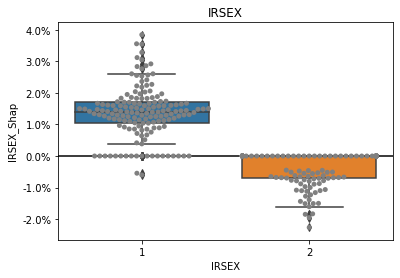

EDUHIGHCAT


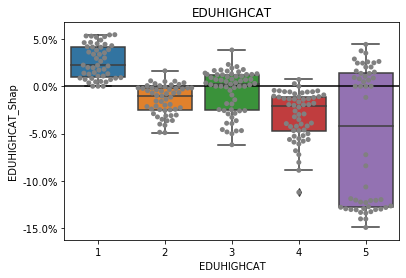

AGE2


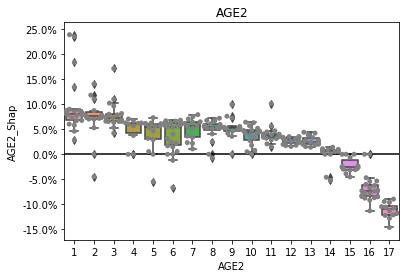

IRALCRC


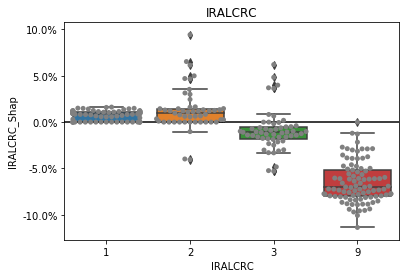

IRALCFY


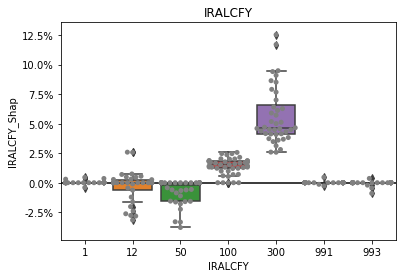

CABINGEVR


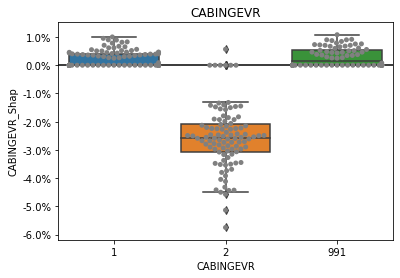

IRALCAGE


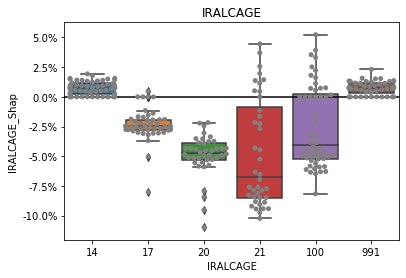

TXYRRECVD2


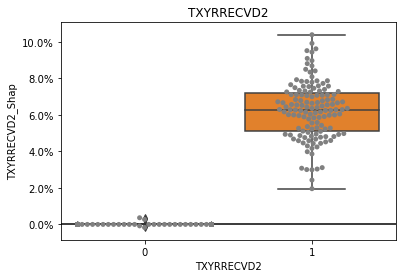

TXEVRRCVD2


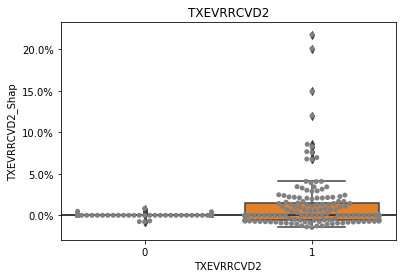

IRCIGRC


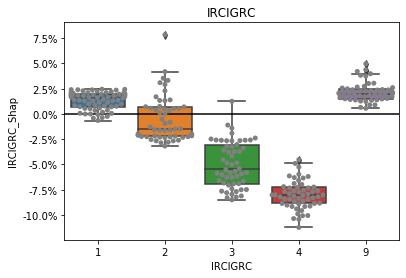

CIGAGE


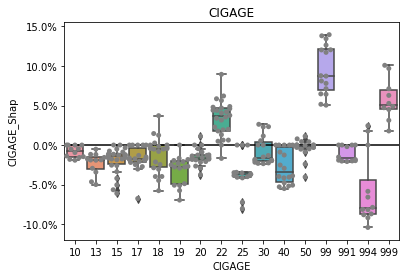

TOBYR


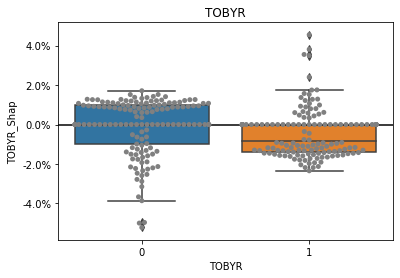

FUCIG18


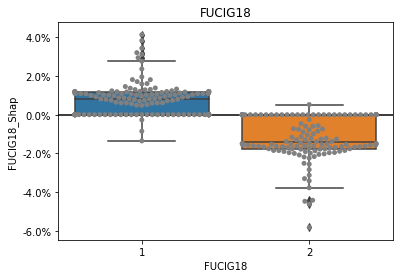

IRMJRC


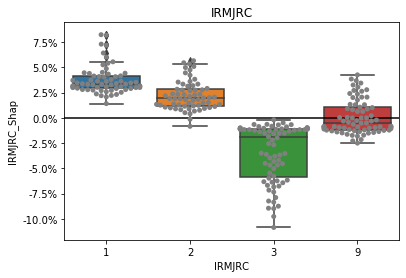

IRMJFY


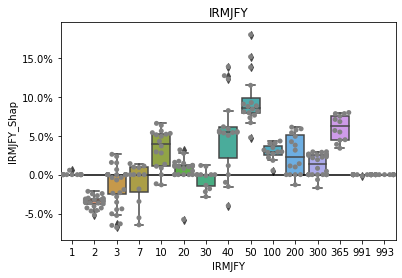

FUMJ18


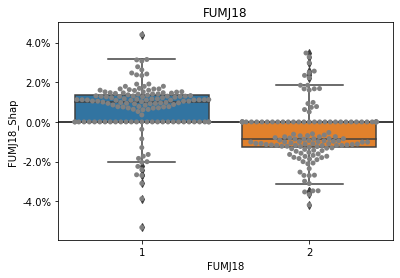

IRCOCRC


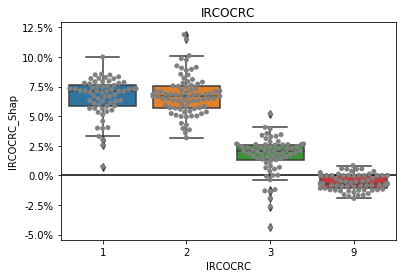

IRCRKRC


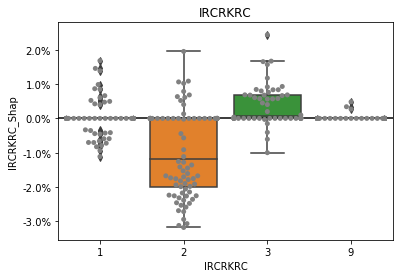

IRHERRC


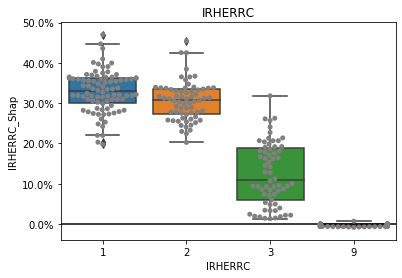

IRHALLUCREC


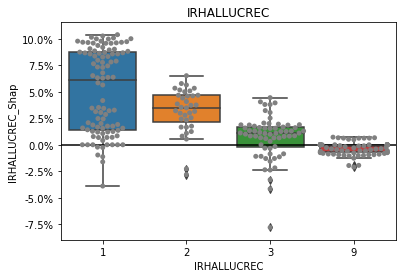

IRLSDRC


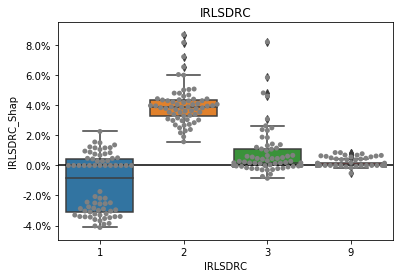

IRECSTMOREC


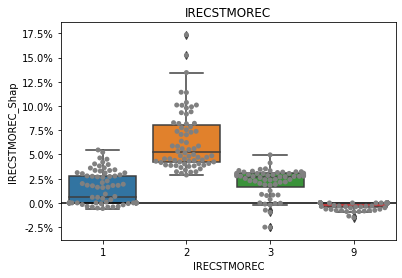

IRINHALREC


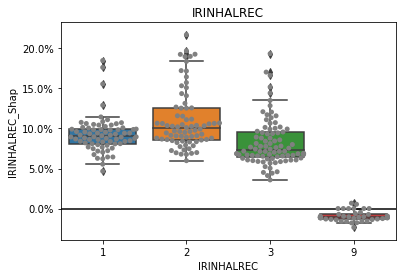

IRMETHAMREC


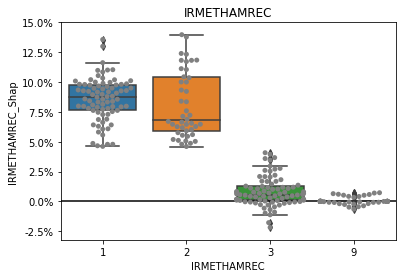

ADDPREV


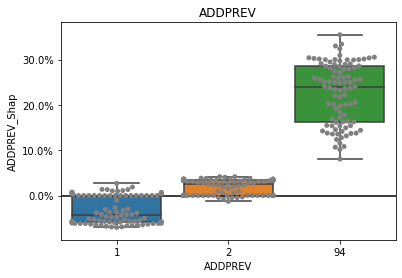

ADDSCEV


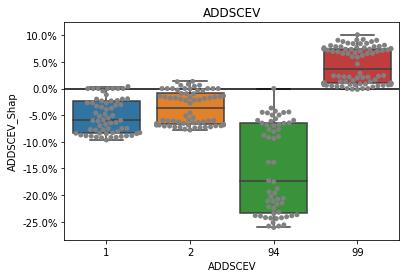

BOOKED


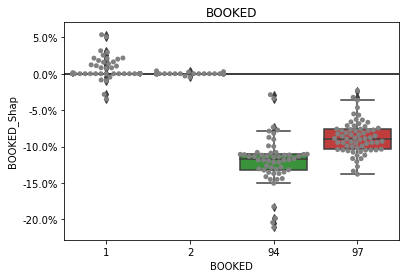

In [40]:
for k in inputDict:
    if k != 'NAME':
        plt.figure() #Createes a new figure
        print(k)
        ax = sns.boxplot(x=k, y=k+'_Shap', data=dfTestResults).set_title(k)
        ax = sns.swarmplot(x=k, y=k+'_Shap', data=dfTestResults, color='gray')
        ax.axhline(0, ls='-', color='black') #Horizontal line
        vals = ax.get_yticks()
        ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
        plt.show()

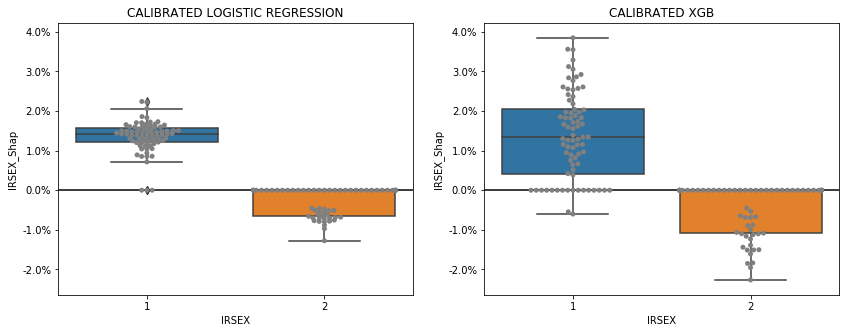

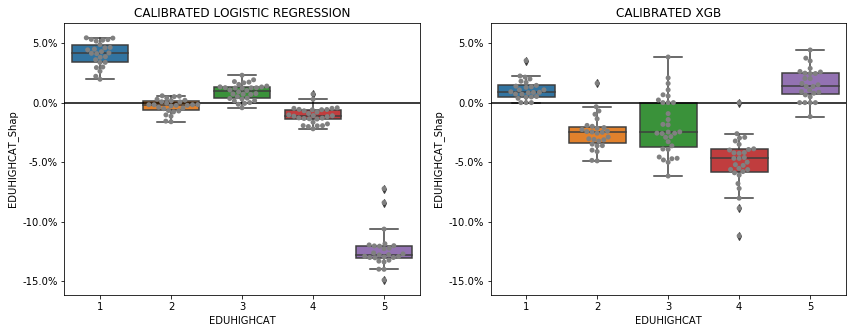

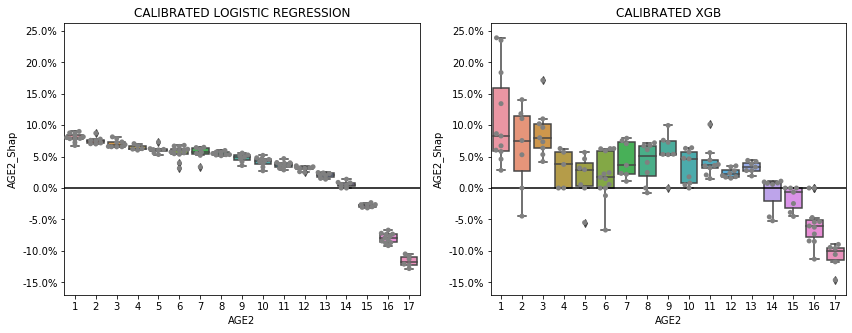

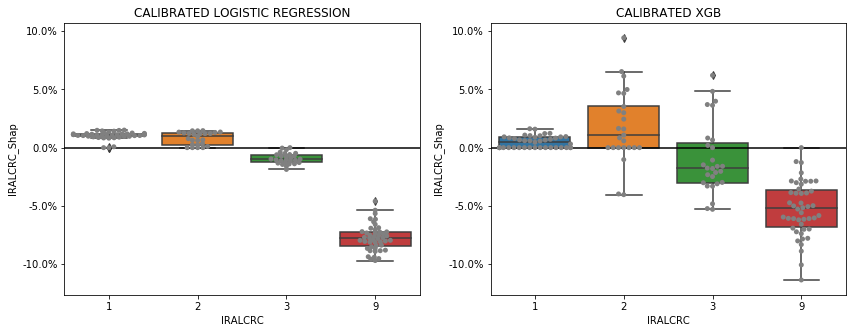

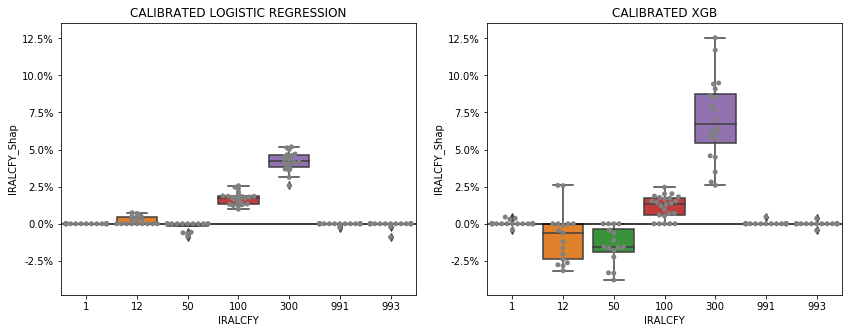

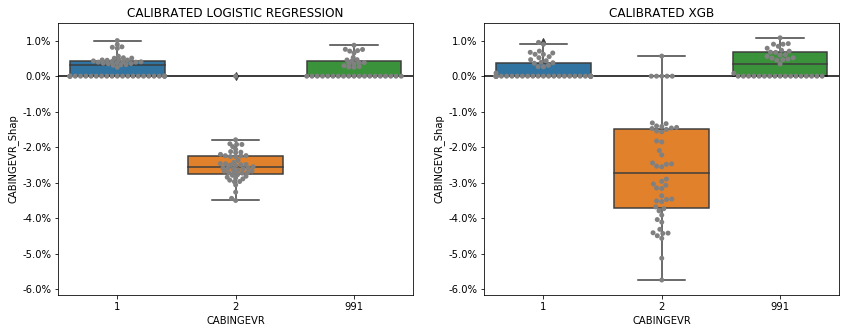

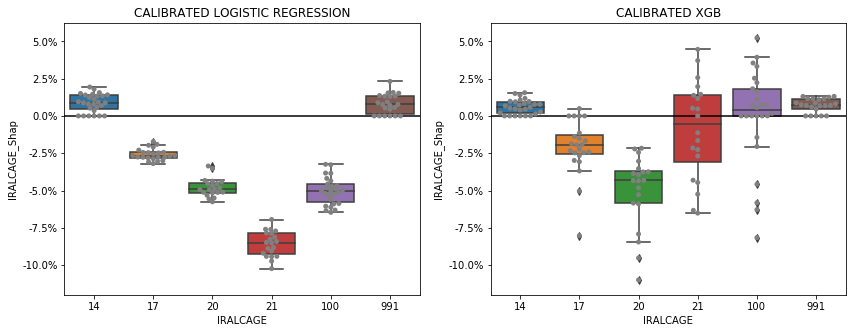

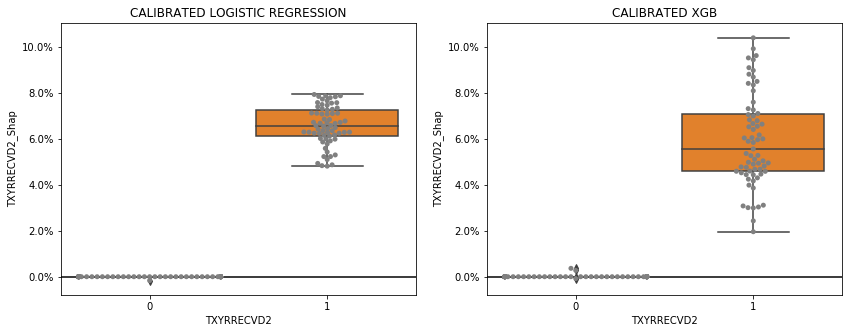

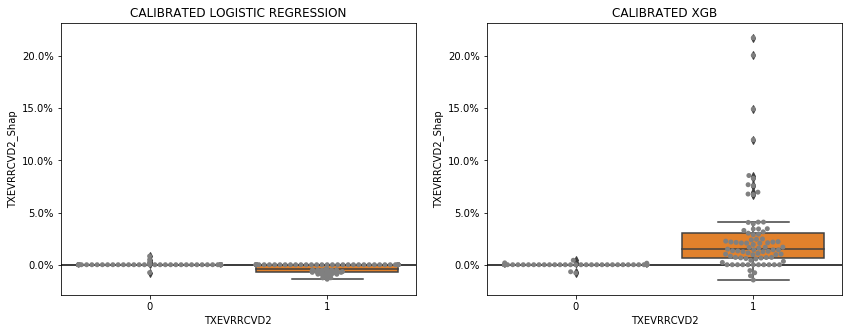

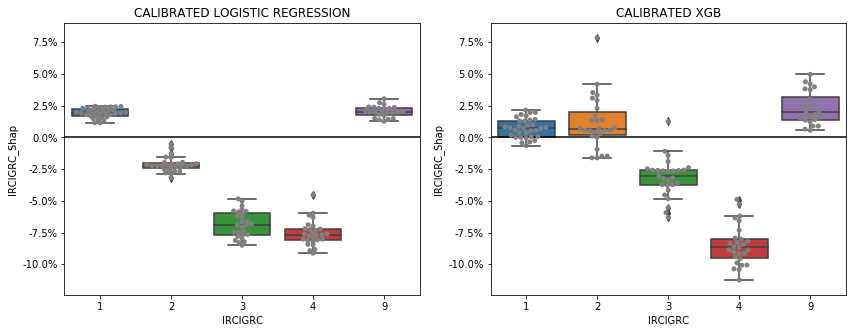

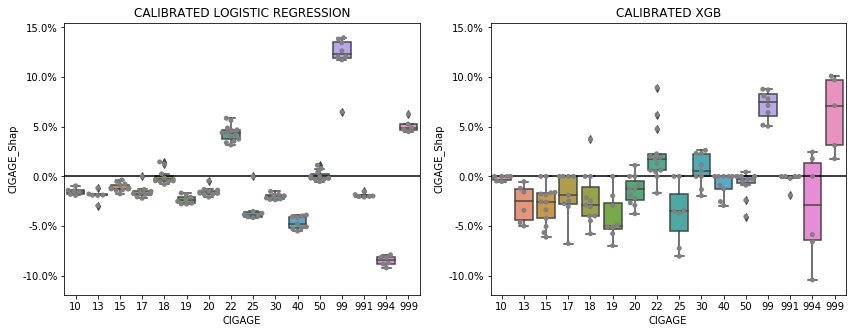

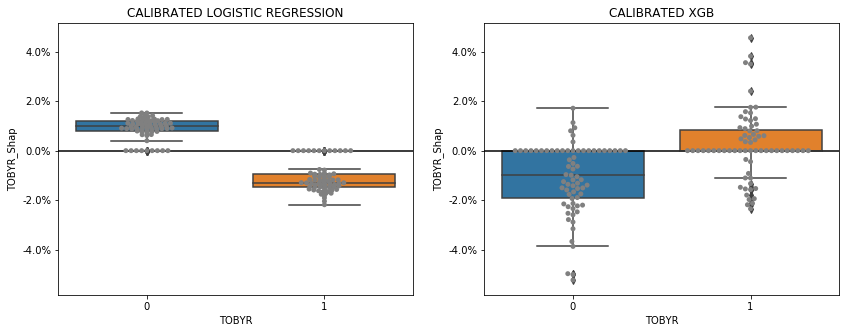

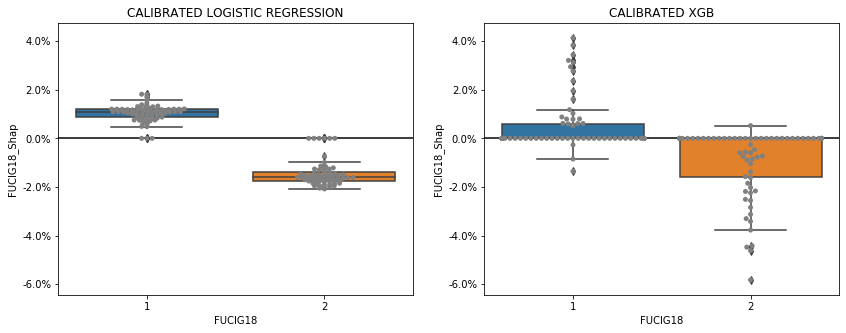

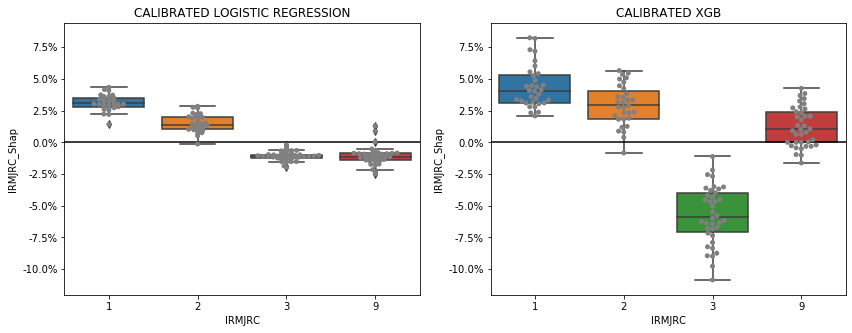

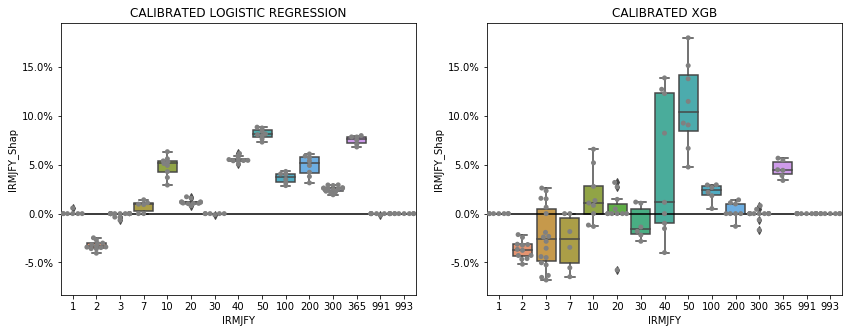

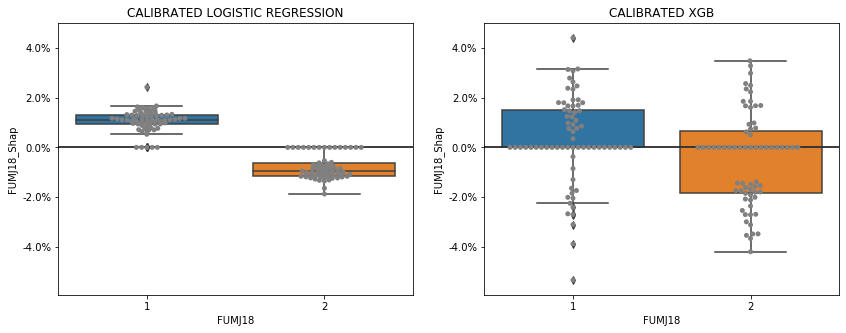

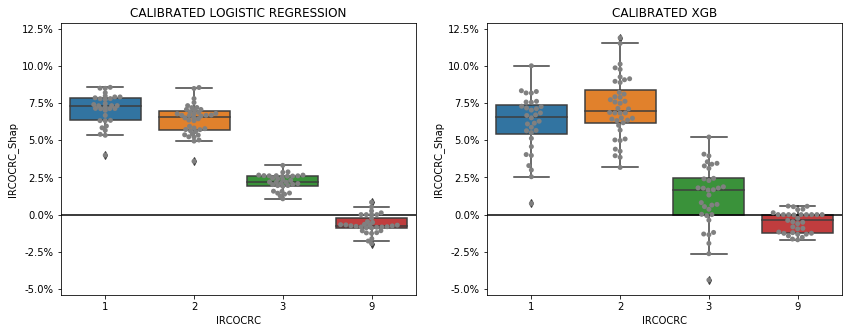

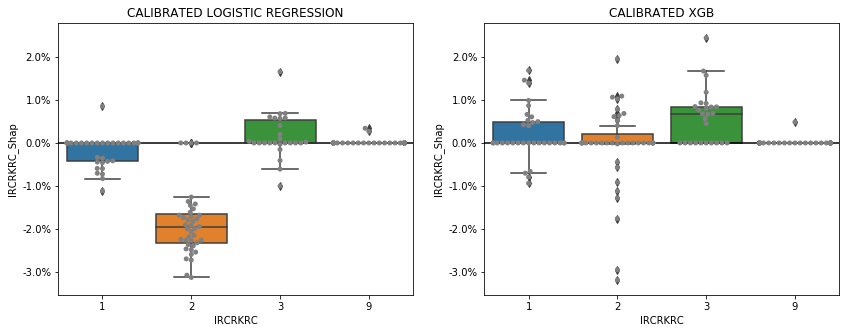

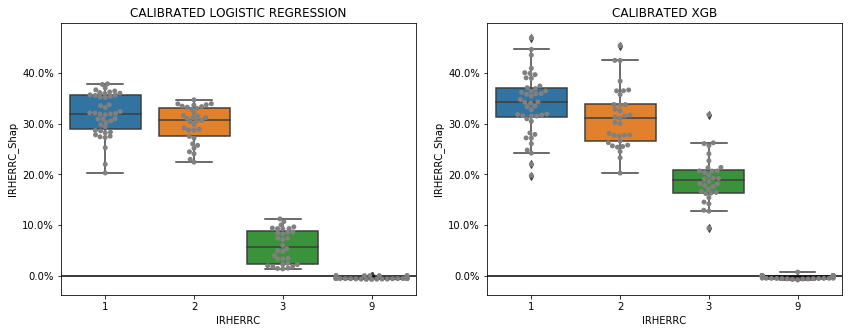

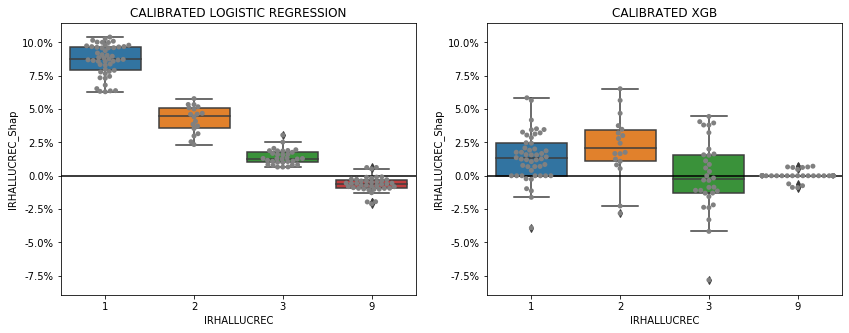

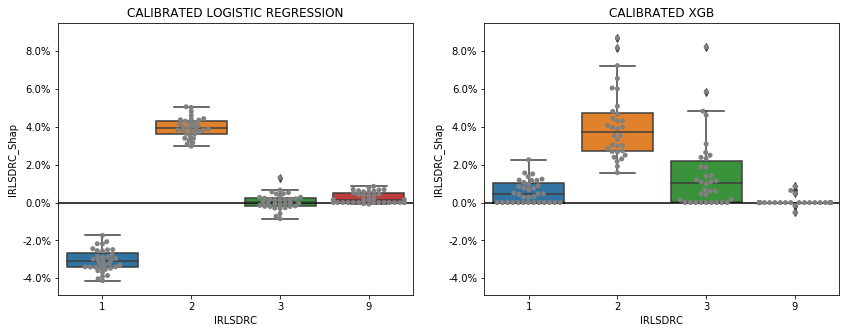

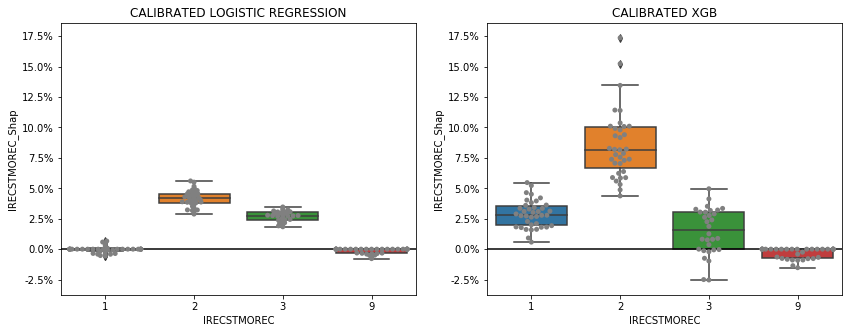

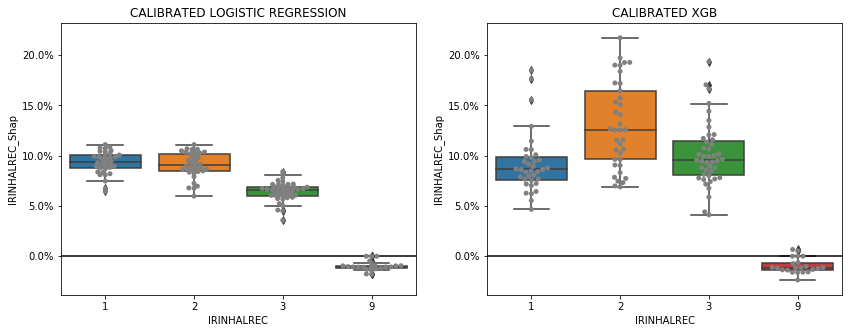

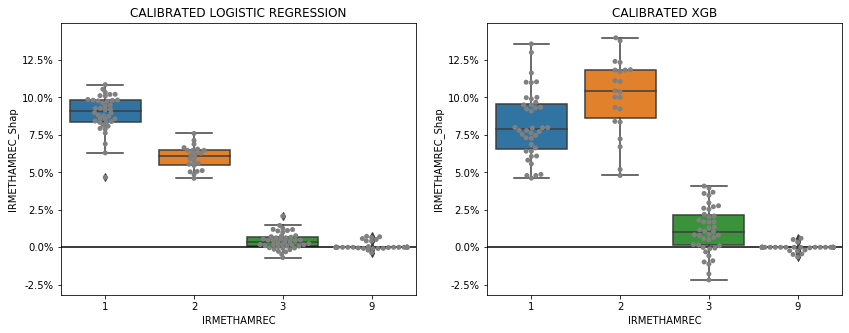

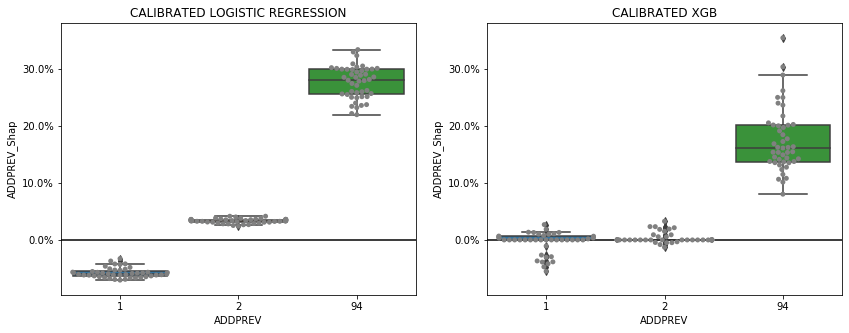

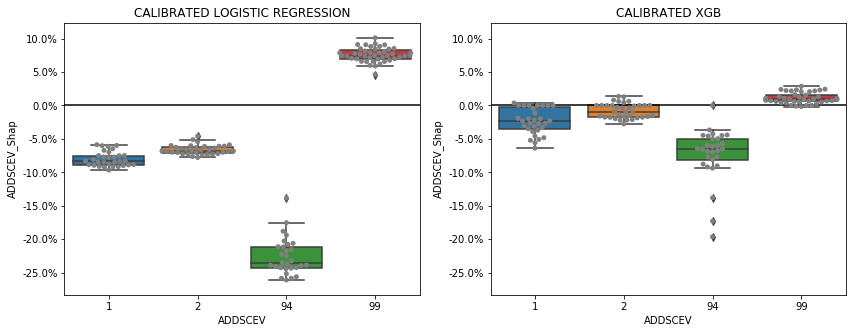

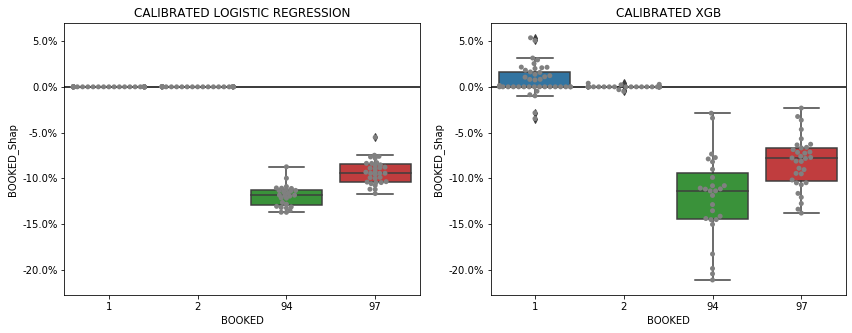

In [61]:
for k in inputDict:
    if k != 'NAME':
        fig, ax =plt.subplots(1,2, figsize=(14, 5), sharey=True)

        #for i, model in enumerate(['CALIBRATED LOGISTIC REGRESSION','CALIBRATED XGB']):
        model='CALIBRATED LOGISTIC REGRESSION'
        plotData = dfTestResults[dfTestResults['Model']==model]
        ax1 = sns.boxplot(x=k, y=k+'_Shap', data=plotData, ax=ax[0]).set_title(model)
        ax1 = sns.swarmplot(x=k, y=k+'_Shap', data=plotData, color='gray', ax=ax[0])
        ax1.axhline(0, ls='-', color='black') #Horizontal line
        
        model='CALIBRATED XGB'
        plotData = dfTestResults[dfTestResults['Model']==model]    
        ax2 = sns.boxplot(x=k, y=k+'_Shap', data=plotData, ax=ax[1]).set_title(model)
        ax2 = sns.swarmplot(x=k, y=k+'_Shap', data=plotData, color='gray', ax=ax[1])
        ax2.axhline(0, ls='-', color='black') #Horizontal line
        #ax2.tick_params(labelcolor='b', left='on',right='on',top='on',bottom='on')
        ax2.yaxis.set_tick_params(which='both', labelbottom=True)
        
        vals = ax1.get_yticks()
        ax1.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
        ax2.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
        plt.show()


# plt.figure() #Createes a new figure
#         print(k)
#         ax = sns.boxplot(x=k, y=k+'_Shap', data=dfTestResults).set_title(k)
#         ax = sns.swarmplot(x=k, y=k+'_Shap', data=dfTestResults, color='gray')
#         ax.axhline(0, ls='-', color='black') #Horizontal line
#         vals = ax.get_yticks()
#         ax.set_yticklabels(['{:,.1%}'.format(x) for x in vals])
#         plt.show()

# for i, model in enumerate(['CALIBRATED LOGISTIC REGRESSION','CALIBRATED XGB']):
#             plotData = dfTestResults[dfTestResults['Model']==model]    
#             sns.boxplot(x="ADDSCEV", y="ADDSCEV_Shap", data=plotData, ax=ax[i]).set_title(model)
#             sns.swarmplot(x="ADDSCEV", y="ADDSCEV_Shap", data=plotData, color=".25", ax=ax[i])
#         plt.show()


# 4. Other Testing

In [10]:
#Test that we can open the friendly names dictionary
dictFriendlyVarNames = oe.getFriendlyVarNames()

#OLD METHOD
# with open(dataDir+'dictFriendlyVarNames.txt','r') as f:
#     dictFriendlyVarNames = eval(f.read())
    
dictFriendlyVarNames

{'IRSEX': 'Gender',
 'EDUHIGHCAT': 'Highest Education',
 'AGE2': 'Age',
 'IRALCRC': 'Alcohol Recency',
 'IRALCFY': 'Alcohol Frequency ',
 'CABINGEVR': 'Binge Drinking',
 'IRALCAGE': 'Age First Used Alcohol',
 'TXYRRECVD2': 'Alc/Drug Tx, Past Yr',
 'TXEVRRCVD2': 'Alc/Drug Tx, Lifetime',
 'IRCIGRC': 'Cigarette Recency',
 'CIGAGE': 'Daily Cigarette Use Age',
 'TOBYR': 'Tobacco Use, Past Year',
 'FUCIG18': 'Cigarettes Under 18',
 'IRMJRC': 'Marijuana Recency',
 'IRMJFY': 'Marijuana Frequency',
 'FUMJ18': 'Marijuana Under 18',
 'IRCOCRC': 'Cocaine Recency',
 'IRCRKRC': 'Crack Recency',
 'IRHERRC': 'Heroine Recency',
 'IRHALLUCREC': 'Hallucinogen Recency',
 'IRLSDRC': 'LSD Recency',
 'IRECSTMOREC': 'Ecstacy Recency',
 'IRINHALREC': 'Inhalant Recency',
 'IRMETHAMREC': 'Meth Recency',
 'ADDPREV': 'Multi-Day Depression',
 'ADDSCEV': 'Multi-Day Discouraged',
 'BOOKED': 'Arrested and Booked'}

# Appendix: Other Code, Function Testing, Etc.

In [11]:
#Testing creating dataframe from dictionary
a = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter'}
b = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 2, 'AGE2': 13, 'IRALCRC': 1, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 991, 'TXYRRECVD2': 1, 'TXEVRRCVD2': 1, 'IRCIGRC': 3, 'CIGDLYMO': 2, 'CIGAGE': 30, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 9, 'IRMJFY': 1, 'FUMJ18': 2, 'IRCOCRC': 9, 'IRCRKRC': 2, 'IRHERRC': 3, 'IRHALLUCREC': 9, 'IRLSDRC': 1, 'IRECSTMOREC': 1, 'IRINHALREC': 3, 'IRMETHAMREC': 2, 'ADDPREV': 2, 'ADDSCEV': 2, 'BOOKED': 2, 'IRCIGRC_Shap': -0.07299654091300585, 'ADDSCEV_Shap': -0.06865909213385069, 'CIGAGE_Shap': -0.05574356218385848, 'IRCRKRC_Shap': -0.04934079270700638, 'IRLSDRC_Shap': -0.04646291598195351, 'IRMJRC_Shap': -0.0200648067591507, 'TOBYR_Shap': -0.015489018333968665, 'FUCIG18_Shap': -0.01138623521782741, 'IRCOCRC_Shap': -0.010061910431149564, 'FUMJ18_Shap': -0.009741800963022434, 'IRHALLUCREC_Shap': -0.008625047228143813, 'IRMJFY_Shap': -0.004902287641520897, 'CIGDLYMO_Shap': 0.0, 'TXEVRRCVD2_Shap': 0.0, 'BOOKED_Shap': 0.0024776782586973176, 'CABINGEVR_Shap': 0.00685966595368058, 'EDUHIGHCAT_Shap': 0.014366252833132368, 'IRALCRC_Shap': 0.014641349875946778, 'IRSEX_Shap': 0.015423509266007558, 'IRALCAGE_Shap': 0.017224785647449774, 'AGE2_Shap': 0.02299620739872297, 'ADDPREV_Shap': 0.028591442326717936, 'IRALCFY_Shap': 0.036158901226165434, 'IRINHALREC_Shap': 0.04385787814223628, 'IRECSTMOREC_Shap': 0.055529423394040836, 'IRHERRC_Shap': 0.07470339366460665, 'TXYRRECVD2_Shap': 0.07821903891985728, 'IRMETHAMREC_Shap': 0.12716643169159556}
c = {'predProb': 0.3271889400921659, 'predPercentile': 0.8793103448275862, 'NAME': 'Test Scripter', 'IRSEX': 1, 'EDUHIGHCAT': 2, 'AGE2': 13, 'IRALCRC': 1, 'IRALCFY': 100, 'CABINGEVR': 1, 'IRALCAGE': 991, 'TXYRRECVD2': 1, 'TXEVRRCVD2': 1, 'IRCIGRC': 3, 'CIGDLYMO': 2, 'CIGAGE': 30, 'TOBYR': 1, 'FUCIG18': 2, 'IRMJRC': 9, 'IRMJFY': 1, 'FUMJ18': 2, 'IRCOCRC': 9, 'IRCRKRC': 2, 'IRHERRC': 3, 'IRHALLUCREC': 9, 'IRLSDRC': 1, 'IRECSTMOREC': 1, 'IRINHALREC': 3, 'IRMETHAMREC': 2, 'ADDPREV': 2, 'ADDSCEV': 2, 'BOOKED': 2, 'IRCIGRC_Shap': -0.07299654091300585, 'ADDSCEV_Shap': -0.06865909213385069, 'CIGAGE_Shap': -0.05574356218385848, 'IRCRKRC_Shap': -0.04934079270700638, 'IRLSDRC_Shap': -0.04646291598195351, 'IRMJRC_Shap': -0.0200648067591507, 'TOBYR_Shap': -0.015489018333968665, 'FUCIG18_Shap': -0.01138623521782741, 'IRCOCRC_Shap': -0.010061910431149564, 'FUMJ18_Shap': -0.009741800963022434, 'IRHALLUCREC_Shap': -0.008625047228143813, 'IRMJFY_Shap': -0.004902287641520897, 'CIGDLYMO_Shap': 0.0, 'TXEVRRCVD2_Shap': 0.0, 'BOOKED_Shap': 0.0024776782586973176, 'CABINGEVR_Shap': 0.00685966595368058, 'EDUHIGHCAT_Shap': 0.014366252833132368, 'IRALCRC_Shap': 0.014641349875946778, 'IRSEX_Shap': 0.015423509266007558, 'IRALCAGE_Shap': 0.017224785647449774, 'AGE2_Shap': 0.02299620739872297, 'ADDPREV_Shap': 0.028591442326717936, 'IRALCFY_Shap': 0.036158901226165434, 'IRINHALREC_Shap': 0.04385787814223628, 'IRECSTMOREC_Shap': 0.055529423394040836, 'IRHERRC_Shap': 0.07470339366460665, 'TXYRRECVD2_Shap': 0.07821903891985728, 'IRMETHAMREC_Shap': 0.12716643169159556}

# for k in a:
#     a[k] = [k]

df = pd.DataFrame()
df = df.append(a, ignore_index=True)
df = df.append(b, ignore_index=True)
df

,NAME,predPercentile,predProb,ADDPREV,ADDPREV_Shap,ADDSCEV,ADDSCEV_Shap,AGE2,AGE2_Shap,BOOKED,BOOKED_Shap,CABINGEVR,CABINGEVR_Shap,CIGAGE,CIGAGE_Shap,CIGDLYMO,CIGDLYMO_Shap,EDUHIGHCAT,EDUHIGHCAT_Shap,FUCIG18,FUCIG18_Shap,FUMJ18,FUMJ18_Shap,IRALCAGE,IRALCAGE_Shap,IRALCFY,IRALCFY_Shap,IRALCRC,IRALCRC_Shap,IRCIGRC,IRCIGRC_Shap,IRCOCRC,IRCOCRC_Shap,IRCRKRC,IRCRKRC_Shap,IRECSTMOREC,IRECSTMOREC_Shap,IRHALLUCREC,IRHALLUCREC_Shap,IRHERRC,IRHERRC_Shap,IRINHALREC,IRINHALREC_Shap,IRLSDRC,IRLSDRC_Shap,IRMETHAMREC,IRMETHAMREC_Shap,IRMJFY,IRMJFY_Shap,IRMJRC,IRMJRC_Shap,IRSEX,IRSEX_Shap,TOBYR,TOBYR_Shap,TXEVRRCVD2,TXEVRRCVD2_Shap,TXYRRECVD2,TXYRRECVD2_Shap
0,Test Scripter,0.87931,0.327189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Test Scripter,0.87931,0.327189,2.0,0.028591,2.0,-0.068659,13.0,0.022996,2.0,0.002478,1.0,0.00686,30.0,-0.055744,2.0,0.0,2.0,0.014366,2.0,-0.011386,2.0,-0.009742,991.0,0.017225,100.0,0.036159,1.0,0.014641,3.0,-0.072997,9.0,-0.010062,2.0,-0.049341,1.0,0.055529,9.0,-0.008625,3.0,0.074703,3.0,0.043858,1.0,-0.046463,2.0,0.127166,1.0,-0.004902,9.0,-0.020065,1.0,0.015424,1.0,-0.015489,1.0,0.0,1.0,0.078219


In [12]:
#This was used for early testing
limChoicesDict = {'NAME':['Test Scripter'],
                  'IRSEX':[1,],
                  'EDUHIGHCAT':[3],
                  'AGE2':[10],
                  'IRALCRC':[1],
                  'IRALCFY':[12],
                  'CABINGEVR':[2],
                  'IRALCAGE':[17],
                  'TXYRRECVD2':[1],
                  'TXEVRRCVD2':[0],
                  'IRCIGRC':[2],
                  'CIGDLYMO':[91],
                  'CIGAGE':[18],
                  'TOBYR':[0],
                  'FUCIG18':[1],
                  'IRMJRC':[3],
                  'IRMJFY':[40],
                  'FUMJ18':[2],
                  'IRCOCRC':[1],
                  'IRCRKRC':[1],
                  'IRHERRC':[1],
                  'IRHALLUCREC':[2],
                  'IRLSDRC':[2],
                  'IRECSTMOREC':[3],
                  'IRINHALREC':[3],
                  'IRMETHAMREC':[2],
                  'ADDPREV':[1],
                  'ADDSCEV':[1],
                  'BOOKED':[1],
                 }

limChoicesDict

{'NAME': ['Test Scripter'],
 'IRSEX': [1],
 'EDUHIGHCAT': [3],
 'AGE2': [10],
 'IRALCRC': [1],
 'IRALCFY': [12],
 'CABINGEVR': [2],
 'IRALCAGE': [17],
 'TXYRRECVD2': [1],
 'TXEVRRCVD2': [0],
 'IRCIGRC': [2],
 'CIGDLYMO': [91],
 'CIGAGE': [18],
 'TOBYR': [0],
 'FUCIG18': [1],
 'IRMJRC': [3],
 'IRMJFY': [40],
 'FUMJ18': [2],
 'IRCOCRC': [1],
 'IRCRKRC': [1],
 'IRHERRC': [1],
 'IRHALLUCREC': [2],
 'IRLSDRC': [2],
 'IRECSTMOREC': [3],
 'IRINHALREC': [3],
 'IRMETHAMREC': [2],
 'ADDPREV': [1],
 'ADDSCEV': [1],
 'BOOKED': [1]}

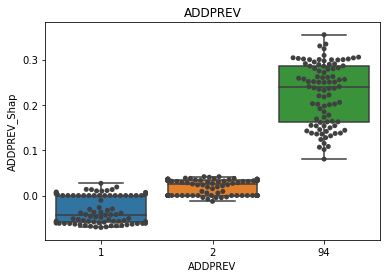

In [13]:
#Test plot
ax = sns.boxplot(x="ADDPREV", y="ADDPREV_Shap", data=dfTestResults).set_title('ADDPREV')
ax = sns.swarmplot(x="ADDPREV", y="ADDPREV_Shap", data=dfTestResults, color=".25")

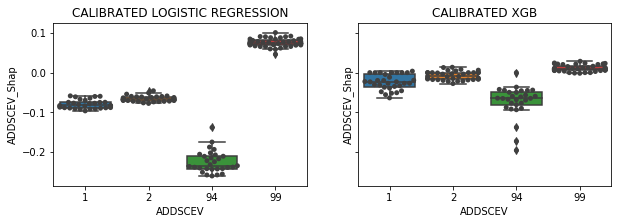

In [39]:
#Test plot side by side
fig, ax =plt.subplots(1,2, figsize=(10, 3), sharey=True)

for i, model in enumerate(['CALIBRATED LOGISTIC REGRESSION','CALIBRATED XGB']):
    plotData = dfTestResults[dfTestResults['Model']==model]    
    sns.boxplot(x="ADDSCEV", y="ADDSCEV_Shap", data=plotData, ax=ax[i]).set_title(model)
    sns.swarmplot(x="ADDSCEV", y="ADDSCEV_Shap", data=plotData, color=".25", ax=ax[i])
plt.show()

In [37]:
plotData

,ADDPREV,ADDPREV_Shap,ADDSCEV,ADDSCEV_Shap,AGE2,AGE2_Shap,BOOKED,BOOKED_Shap,CABINGEVR,CABINGEVR_Shap,CIGAGE,CIGAGE_Shap,EDUHIGHCAT,EDUHIGHCAT_Shap,FUCIG18,FUCIG18_Shap,FUMJ18,FUMJ18_Shap,IRALCAGE,IRALCAGE_Shap,IRALCFY,IRALCFY_Shap,IRALCRC,IRALCRC_Shap,IRCIGRC,IRCIGRC_Shap,IRCOCRC,IRCOCRC_Shap,IRCRKRC,IRCRKRC_Shap,IRECSTMOREC,IRECSTMOREC_Shap,IRHALLUCREC,IRHALLUCREC_Shap,IRHERRC,IRHERRC_Shap,IRINHALREC,IRINHALREC_Shap,IRLSDRC,IRLSDRC_Shap,IRMETHAMREC,IRMETHAMREC_Shap,IRMJFY,IRMJFY_Shap,IRMJRC,IRMJRC_Shap,IRSEX,IRSEX_Shap,Model,NAME,TOBYR,TOBYR_Shap,TXEVRRCVD2,TXEVRRCVD2_Shap,TXYRRECVD2,TXYRRECVD2_Shap,TestCase,predPercentile,predProb
1,94,0.172763,99,0.000000,2,-0.044678,2,0.000000,2,-0.013184,17,-0.027306,4,-0.039386,2,0.000000,2,0.000000,21,-0.026901,300,0.070062,9,-0.060936,3,0.012596,1,0.062811,3,0.000000,9,-0.008322,1,0.018693,1,0.364823,3,0.078077,9,0.000000,3,0.026045,50,0.138068,3,-0.035220,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.000000,0,0.000000,0,0.000000,1.0,0.995877,0.871619
3,2,0.000000,99,0.020516,2,0.140575,94,-0.108035,991,0.000000,99,0.051574,5,0.013641,1,0.032076,2,0.000000,100,-0.058245,100,0.017200,3,-0.010706,4,-0.073118,1,0.030005,2,0.000000,9,0.000000,1,0.012699,1,0.315259,9,0.006716,9,0.000000,3,0.020414,993,0.000000,3,-0.044999,1,0.013907,CALIBRATED XGB,Test Scripter,0,0.000000,1,0.075748,1,0.103958,3.0,0.980385,0.742801
5,94,0.145441,2,-0.021827,4,0.000000,97,-0.063529,2,-0.013393,15,-0.025469,4,-0.042554,2,-0.008486,1,0.006307,991,0.013130,50,-0.033061,2,0.061446,4,-0.091603,9,-0.008260,3,0.016685,9,-0.006517,1,0.017621,3,0.127405,1,0.071751,1,0.011701,3,-0.011196,3,-0.063291,9,0.010165,2,-0.006878,CALIBRATED XGB,Test Scripter,1,-0.009205,0,0.000000,0,0.000000,5.0,0.864818,0.259998
7,94,0.163721,94,-0.172861,12,0.033745,2,0.000000,991,0.000000,20,-0.012601,1,0.007046,1,0.000000,2,-0.018430,14,0.015574,50,0.000000,9,-0.069135,2,0.016991,9,-0.016443,1,0.000000,2,0.078737,3,-0.041672,2,0.337901,2,0.115863,3,0.000000,9,0.000000,1,0.000000,1,0.023200,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.034957,0,0.000000,1,0.071032,7.0,0.982384,0.751240
9,1,0.013197,2,-0.021155,7,0.023283,2,-0.005015,991,0.008429,15,-0.016106,2,-0.048557,2,-0.021850,1,-0.003711,21,-0.021461,991,0.000000,1,0.006497,4,-0.104228,3,0.034490,3,0.024384,1,0.015853,2,0.027947,2,0.313044,2,0.125428,9,0.000000,9,0.000000,200,-0.013010,3,-0.097659,1,-0.006011,CALIBRATED XGB,Test Scripter,0,-0.022290,1,0.029387,1,0.095223,9.0,0.943778,0.519726
11,1,0.003380,99,0.003734,16,-0.073081,94,-0.108191,991,0.004645,30,-0.019457,3,-0.025996,1,0.016100,1,-0.017296,100,-0.014385,991,0.000000,9,-0.050647,9,0.015370,3,-0.013056,2,-0.029419,2,0.058452,1,-0.016143,1,0.219867,1,0.086259,9,0.000000,9,-0.006471,2,-0.037578,3,-0.064242,2,0.000000,CALIBRATED XGB,Test Scripter,1,-0.014794,1,0.005945,0,0.002749,11.0,0.553348,0.109359
13,94,0.205506,99,0.010633,17,-0.096016,1,0.000000,991,0.000000,20,0.011075,4,-0.038834,2,0.000000,2,0.007742,991,0.011420,1,0.004516,9,-0.031406,2,0.029218,2,0.061765,3,0.000000,3,0.029023,9,0.000000,1,0.371297,2,0.102623,9,0.000000,9,0.000000,3,0.015671,3,-0.041896,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.009287,0,0.000000,1,0.045222,13.0,0.998001,0.890462
15,1,0.000000,94,-0.065249,4,0.000000,1,0.021590,2,-0.029000,25,0.000000,5,0.000000,1,0.000000,2,-0.017298,991,0.000000,100,0.013056,1,0.009249,2,0.035419,2,0.056815,3,0.000000,9,0.000000,9,0.000000,2,0.454329,1,0.095724,1,0.015643,9,0.000000,7,-0.064609,2,0.027494,1,0.000000,CALIBRATED XGB,Test Scripter,1,0.000000,0,0.000000,1,0.048160,15.0,0.987006,0.784938
17,1,0.000000,99,0.008528,1,0.045982,94,-0.113804,1,0.000000,30,-0.013233,3,0.000000,1,0.027644,2,-0.014448,100,0.007307,100,0.016616,1,0.000000,9,0.018200,3,0.032749,2,0.000000,2,0.058855,9,0.000000,2,0.365018,2,0.157363,1,0.013686,3,0.034639,991,0.000000,2,0.042286,2,0.000000,CALIBRATED XGB,Test Scripter,1,0.000000,0,0.000000,0,0.000000,17.0,0.995877,0.871003
19,2,0.000000,99,0.005145,2,0.052934,2,0.000000,991,0.000